In [241]:
#Cargando las librerias necesarias
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import numpy as np

In [242]:
#cargando los datos
X1, y1 = load_diabetes(return_X_y=True)

In [243]:
#Dividiendo los datos
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [244]:
#Creanod el modelo
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42)),
    ('lr2', LinearRegression()),
]

modelo_stacking1 = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=5,
                                          random_state=42)
)

In [245]:
#Entrando y evaluando el modelo
modelo_stacking1.fit(X1_train, y1_train)
modelo_stacking1.score(X1_test, y1_test)

0.3987745440025896

Ejemplo 2

In [246]:
#Generando los datos
X2 = np.linspace(1.0, 50.0, num=100)
y2 = X2**3 + X2**2 + 3*X2 + 2

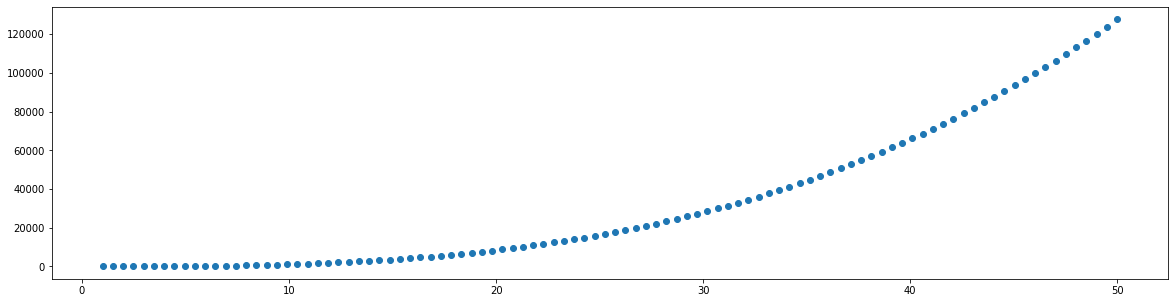

In [247]:
#Visualizando los datos
plt.figure(figsize=(20,5))
plt.scatter(X2, y2)
plt.show()

In [248]:
#Diviendo los datos
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=40)

In [249]:
#Creanod el modelo
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42)),
    ('lr2', LinearRegression()),
]

modelo_stacking2 = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=40)
)

In [250]:
#Entrando el modelo
modelo_stacking2 = modelo_stacking2.fit(X2_train.reshape(-1,1), y2_train)
modelo_stacking2.score(X2_test.reshape(-1,1), y2_test)

0.9551350916943273

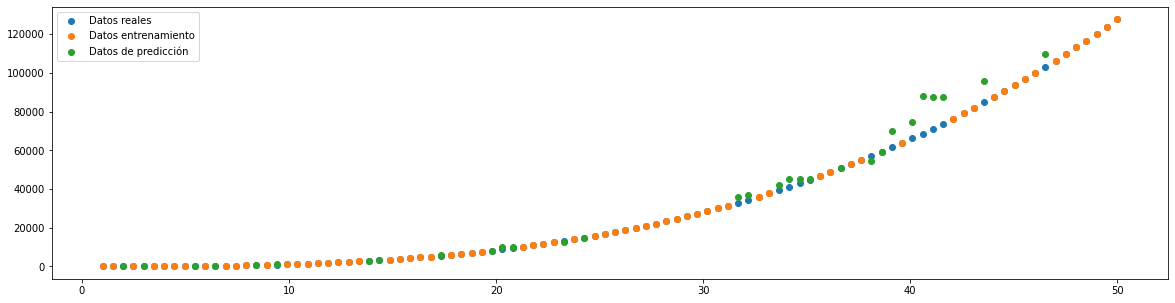

In [251]:
#comparando los resultados
plt.figure(figsize=(20,5))
plt.scatter(X2, y2, label='Datos reales')
plt.scatter(X2_train, y2_train, label='Datos entrenamiento')
plt.scatter(X2_test, modelo_stacking2.predict(X2_test.reshape(-1,1)), label='Datos de predicción')
plt.legend()
plt.show()